In [1]:
#Here we loaded the libraries..!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                    


In [2]:
df = pd.read_csv(r'C:\Users\moran\Desktop\Datasets\Telco - Telco.csv')

In [3]:
df.head()

,Calls,Intern,Text,Data,Age
0,1.12,0.19,23.92,0.18,60
1,1.08,0.22,17.76,0.23,54
2,3.54,0.26,289.79,1.99,34
3,1.09,0.21,19.15,0.21,61
4,1.04,0.24,20.33,0.20,56


In [4]:
#scaling the Data..!

In [5]:
df=df.apply(lamda x: (x-np.mean(x))/np.std(x))

SyntaxError: invalid syntax (Temp/ipykernel_10516/1936198002.py, line 1)

In [6]:
df.var()

Calls         2.299963
Intern        0.142560
Text      45719.637647
Data          1.889135
Age         262.288112
dtype: float64

In [7]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage

In [8]:
Z=linkage(df,'complete')

In [9]:
Z=linkage(df,'single')

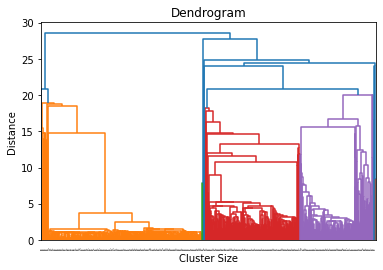

In [10]:
Z=linkage(df,'single')
dendrogram(Z,leaf_rotation=90,leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

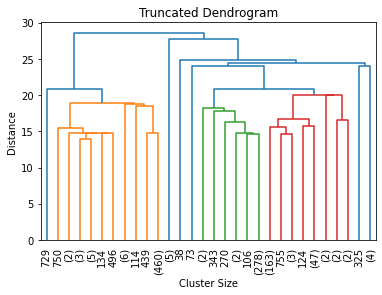

In [11]:
dendrogram (Z,truncate_mode='lastp',p=30,leaf_rotation=90,leaf_font_size=10.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [ ]:
#Aggiomerative Hierachichal Clustering..!

In [22]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [24]:
hclust=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [25]:
hclust.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [27]:
hclust.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 4, 1, 4, 0, 2, 2, 0,
       2, 4, 4, 1, 0, 0, 0, 0, 2, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 4, 0, 4, 2, 0, 1, 3, 4,
       4, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 4, 1, 3, 1, 2, 0, 1, 0, 1, 4, 0,
       1, 1, 0, 0, 0, 0, 0, 2, 4, 1, 4, 2, 0, 0, 1, 2, 0, 0, 4, 0, 1, 0,
       0, 1, 4, 0, 0, 0, 2, 0, 0, 4, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 4, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 4, 3, 2,
       1, 0, 0, 1, 2, 4, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 0, 0, 0, 0, 4, 0,
       1, 0, 0, 2, 1, 2, 4, 1, 1, 0, 0, 1, 0, 4, 4, 0, 0, 1, 1, 0, 0, 2,
       0, 4, 4, 2, 0, 4, 1, 4, 1, 0, 0, 0, 2, 2, 0, 4, 0, 1, 4, 4, 0, 3,
       0, 3, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 4, 0, 4, 0, 0, 1, 0, 4, 1, 2,
       4, 3, 4, 4, 2, 0, 0, 4, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 4,
       4, 0, 0, 0, 4, 2, 4, 1, 2, 0, 0, 0, 0, 0, 2, 4, 1, 0, 1, 0, 2, 0,
       2, 3, 4, 0, 4, 2, 1, 4, 0, 0, 0, 4, 4, 1, 0,

In [28]:
df['Groups']=hclust.labels_

In [29]:
df.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,2.869262,0.508340,25.077828,1.028094,49.293033
1,3.182312,0.367225,314.120751,2.057283,32.277457
2,1.965072,0.173696,464.425580,3.446594,21.608696
3,2.459592,0.901020,212.618163,1.892653,38.877551
4,1.891382,0.165263,552.182105,3.544474,21.381579


In [ ]:
#Here we imported KMeans from Sklearn..!

In [31]:
from sklearn.cluster import KMeans

In [34]:
km=KMeans(n_clusters=5,n_init=40)

In [35]:
km.fit(df)

KMeans(n_clusters=5, n_init=40)

In [37]:
df['Groups']=km.labels_

In [40]:
df.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,2.840524,0.504465,22.511950,1.008595,49.716981
1,2.012214,0.189929,461.747929,3.390143,21.942857
2,1.890844,0.164351,551.598377,3.553636,21.402597
3,3.173432,0.359290,312.274793,2.061657,32.236686
4,2.763167,0.859833,198.634500,1.889167,37.416667


In [41]:
#total within Group SSE

km.inertia_

629203.2246307693

In [48]:
#calculating within group SSE  for diff  Cluster Soln..!

inertias =[]
for k in[2,3,4,5,6,7,8,9,10,11,12]:
    km=KMeans(n_clusters=k,n_init=40)
    inertia=km.fit(df).inertia_
    inertias.append(inertia)

<function matplotlib.pyplot.show(close=None, block=None)>

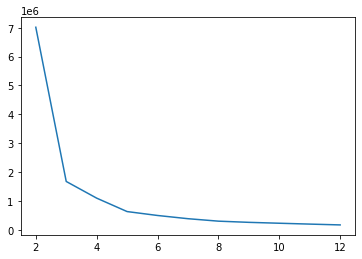

In [49]:
#plotting the scree plot

plt.plot([2,3,4,5,6,7,8,9,10,11,12],inertias)
plt.show